# Multidimensional scaling


In [1]:
options(repr.plot.width=10, repr.plot.height=10)
library(ggrepel)


Loading required package: ggplot2



Suppose we know the pairwise distances between a collection of cities. Can we recover the 2-dimensional coordinates?

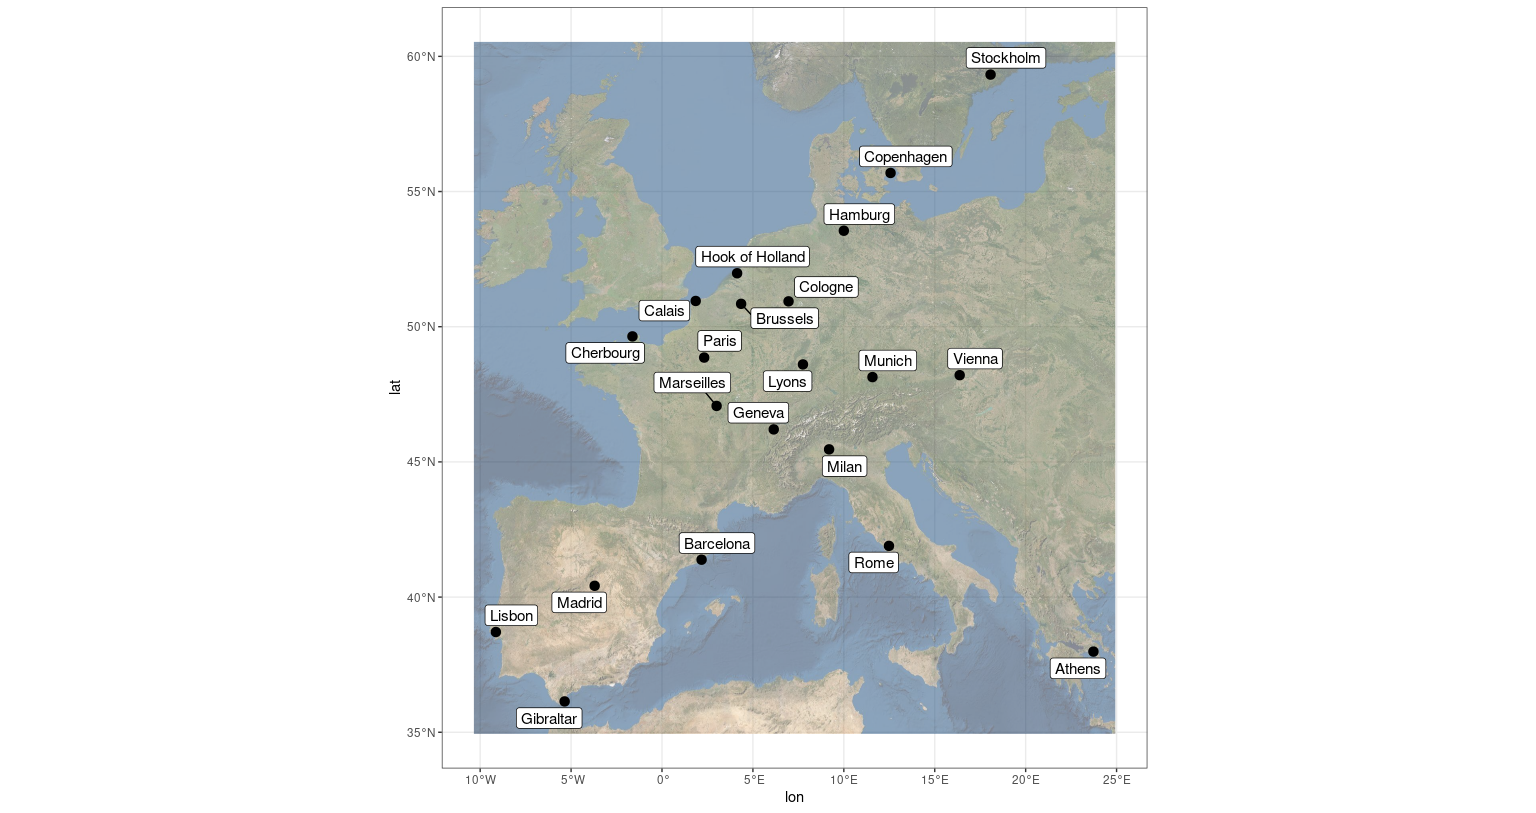

In [3]:
library(tidyverse)
my_eurodist <- read.csv("data/my_eurodist.csv", header=T, row.names=1) %>% as.matrix() %>% as.dist()


In [4]:
library(ggrepel)
my_eurodist %>% as.matrix() %>% round()


,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,Hamburg,⋯,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
Athens,0,1877,2089,2241,2394,1952,2137,1709,2578,2024,⋯,2852,1745,2370,1967,1462,1496,2098,1052,2407,1283
Barcelona,1877,0,1065,1064,965,1124,1761,623,875,1473,⋯,1007,914,506,636,725,1054,831,858,2278,1350
Brussels,2089,1065,0,176,445,183,766,533,1809,488,⋯,1713,349,1316,431,697,602,265,1173,1280,915
Calais,2241,1064,176,0,287,358,884,615,1744,625,⋯,1610,497,1248,440,816,767,235,1293,1382,1088
Cherbourg,2394,965,445,287,0,626,1166,694,1531,912,⋯,1354,692,1039,446,934,978,299,1389,1656,1321
Cologne,1952,1124,183,358,626,0,646,530,1916,357,⋯,1852,266,1430,518,631,456,405,1090,1167,743
Copenhagen,2137,1761,766,884,1166,646,0,1146,2561,289,⋯,2479,853,2074,1163,1161,842,1029,1534,521,871
Geneva,1709,623,533,615,694,530,1146,0,1473,862,⋯,1501,293,1023,259,250,463,412,697,1660,803
Gibraltar,2578,875,1809,1744,1531,1916,2561,1473,0,2272,⋯,439,1750,497,1398,1600,1923,1546,1664,3082,2224
Hamburg,2024,1473,488,625,912,357,289,862,2272,0,⋯,2199,572,1786,874,901,612,747,1309,810,743


Let $d_{ij}$ be the known distance between cities $i$ and $j$. We look for an $n \times 2$-matrix ($n$ being the number of cities, i.e. 21) $X$, with the property that

$$
\forall i,j: ||x_i - x_j|| = d_{ij}
$$

The **norm** $||x_i - x_j||$ is defined as the Euclidean distance between the $i$th and the $j$th row:
$$
||x_i - x_j|| = \sqrt{
    \sum_k (x_{ik} - x_{jk})^2
}
$$


In the general case, there is no guarantee that such a matrix $X$ exists. To make sure that there is always a solution, we define a measure how close a matrix $X$ comes to the ideal.

$$
\mathrm{Stress}(X) = \sqrt{\sum_i\sum_j(||x_i - x_j|| - d_{ij})^2}
$$

**Multi-Dimensional Scaling** (MDS) is a method to find a matrix $X$ that minimizes the Stress.

In [6]:
cities <- my_eurodist %>%
    as.matrix() %>%
    rownames
cities

[1] "Athens"          "Barcelona"       "Brussels"        "Calais"         
 [5] "Cherbourg"       "Cologne"         "Copenhagen"      "Geneva"         
 [9] "Gibraltar"       "Hamburg"         "Hook of Holland" "Lisbon"         
[13] "Lyons"           "Madrid"          "Marseilles"      "Milan"          
[17] "Munich"          "Paris"           "Rome"            "Stockholm"      
[21] "Vienna"

In [7]:
mds <- cmdscale(my_eurodist) %>%
    as_tibble() %>%
    rename(x=1, y=2) %>%
    mutate(city=cities)
    
mds

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


x,y,city
<dbl>,<dbl>,<chr>
-445.41681,-1725.185554,Athens
705.91489,-243.340567,Barcelona
-183.02409,345.969234,Brussels
-73.55102,484.132053,Calais
197.26859,580.399150,Cherbourg
-318.20715,221.226128,Cologne
-949.91348,352.977602,Copenhagen
97.17715,-107.572550,Geneva
1569.06225,-111.726471,Gibraltar


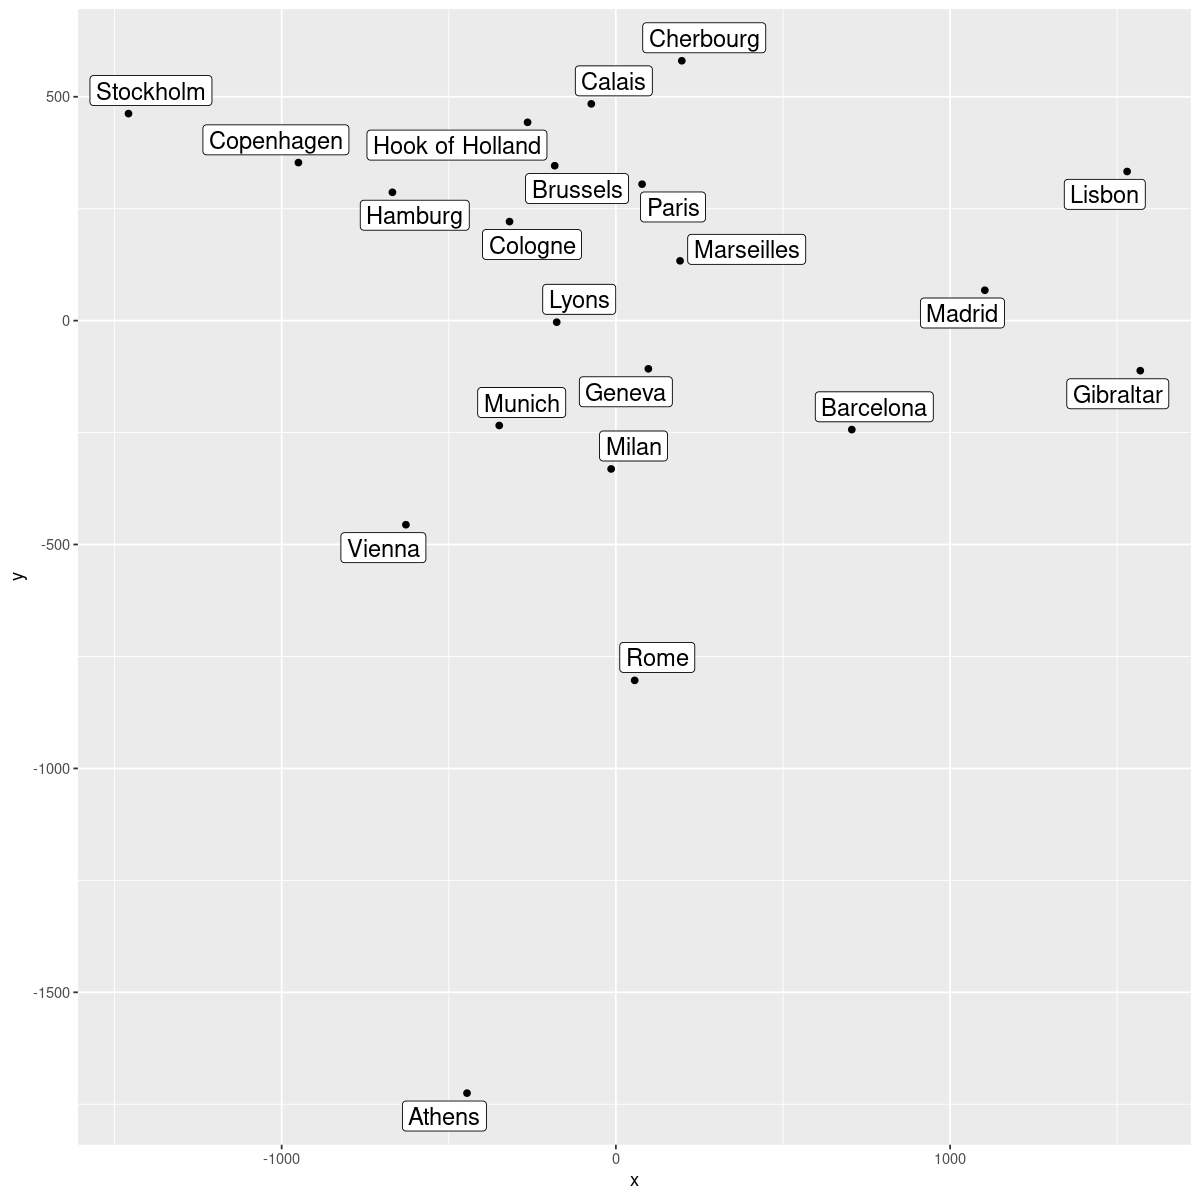

In [8]:
ggplot(mds) +
    geom_point(aes(x=x, y=y)) +
    geom_label_repel(aes(x=x, y=y, label=city), size=5)


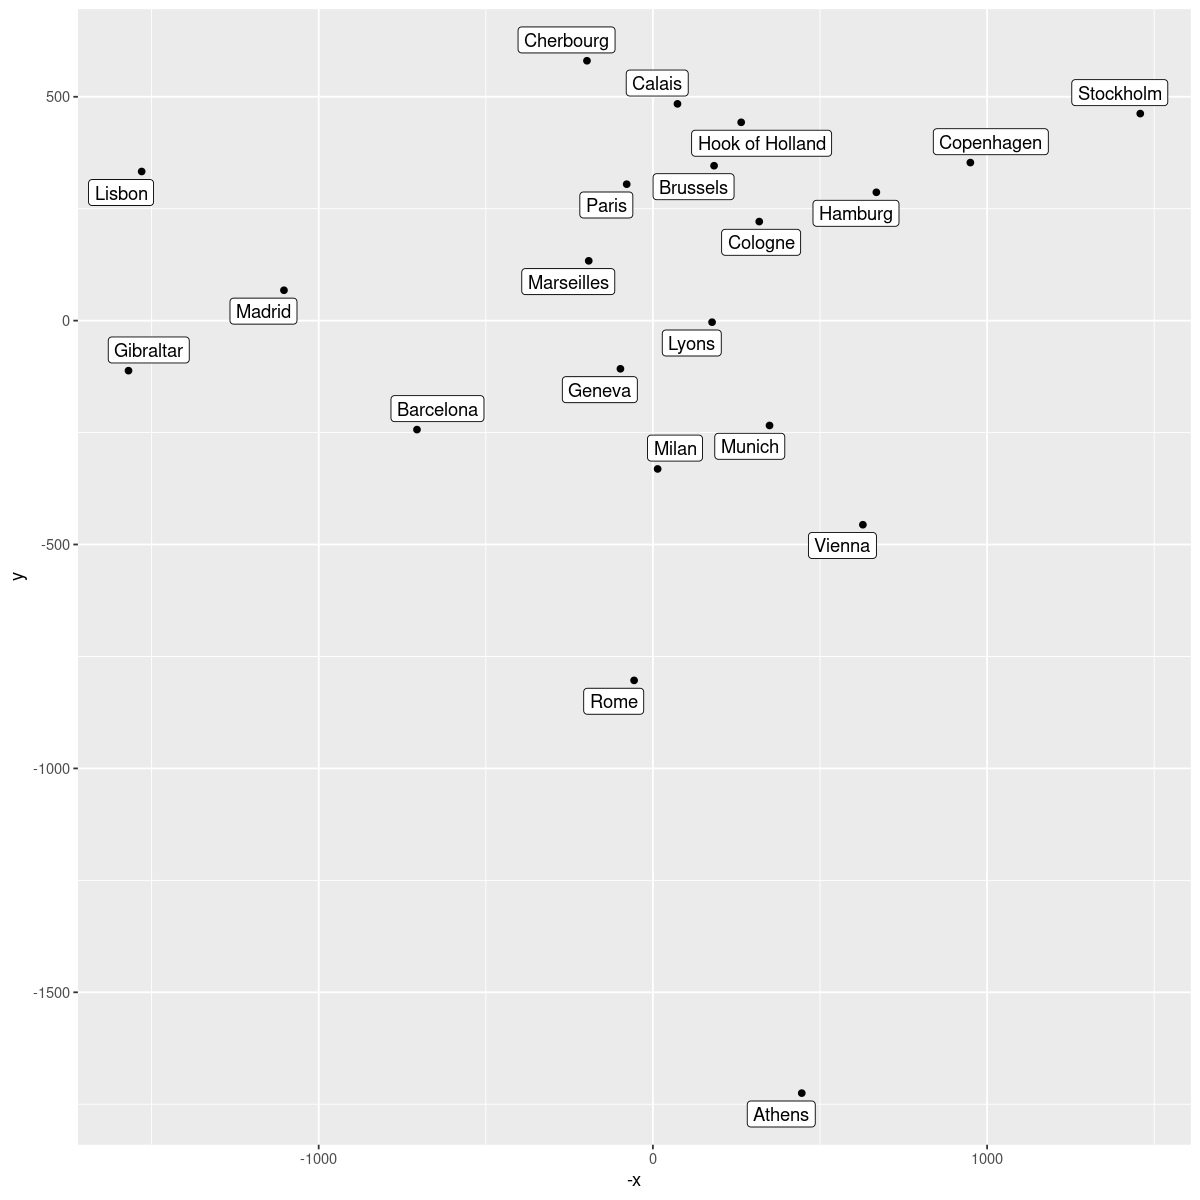

In [9]:
ggplot(mds) +
    geom_point(aes(x=-x, y=y)) +
    geom_label_repel(aes(x=-x, y=y, label=city), max.overlaps=20)


Warning message in dist(mds):
“NAs introduced by coercion”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'



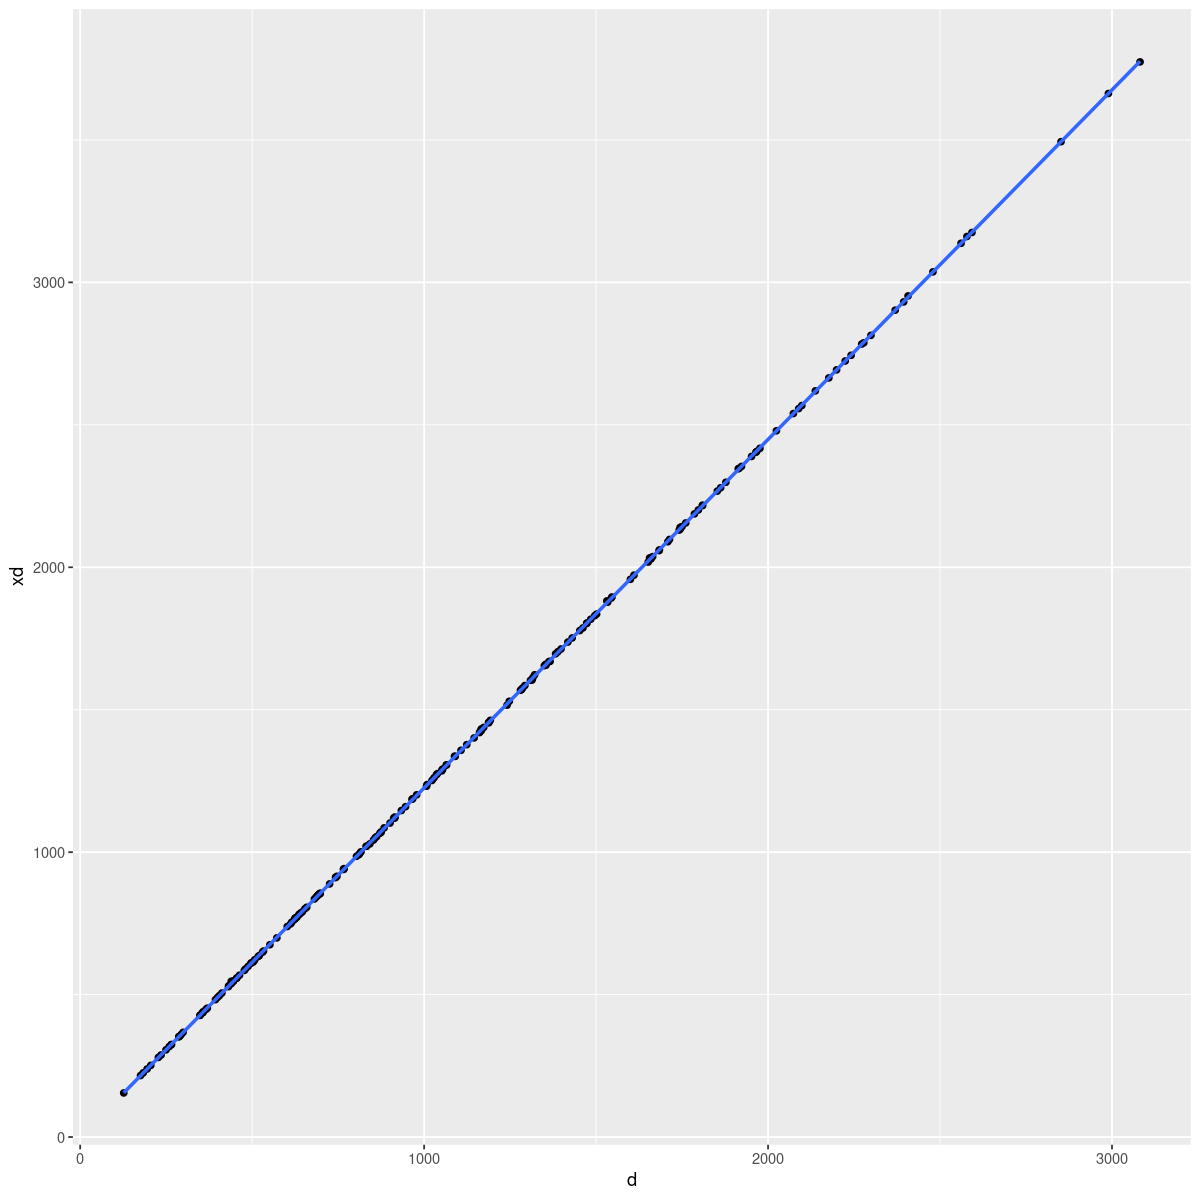

In [10]:
data.frame(d=c(my_eurodist), xd=c(dist(mds))) %>%
    ggplot() + 
    geom_point(aes(x=d, y = xd)) +
    geom_smooth(aes(x=d, y=xd))


This also works $-$ approximately $-$ if the observed distances are not exact but disturbed by some noise.

In [11]:
observed <- my_eurodist %>% as.matrix()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



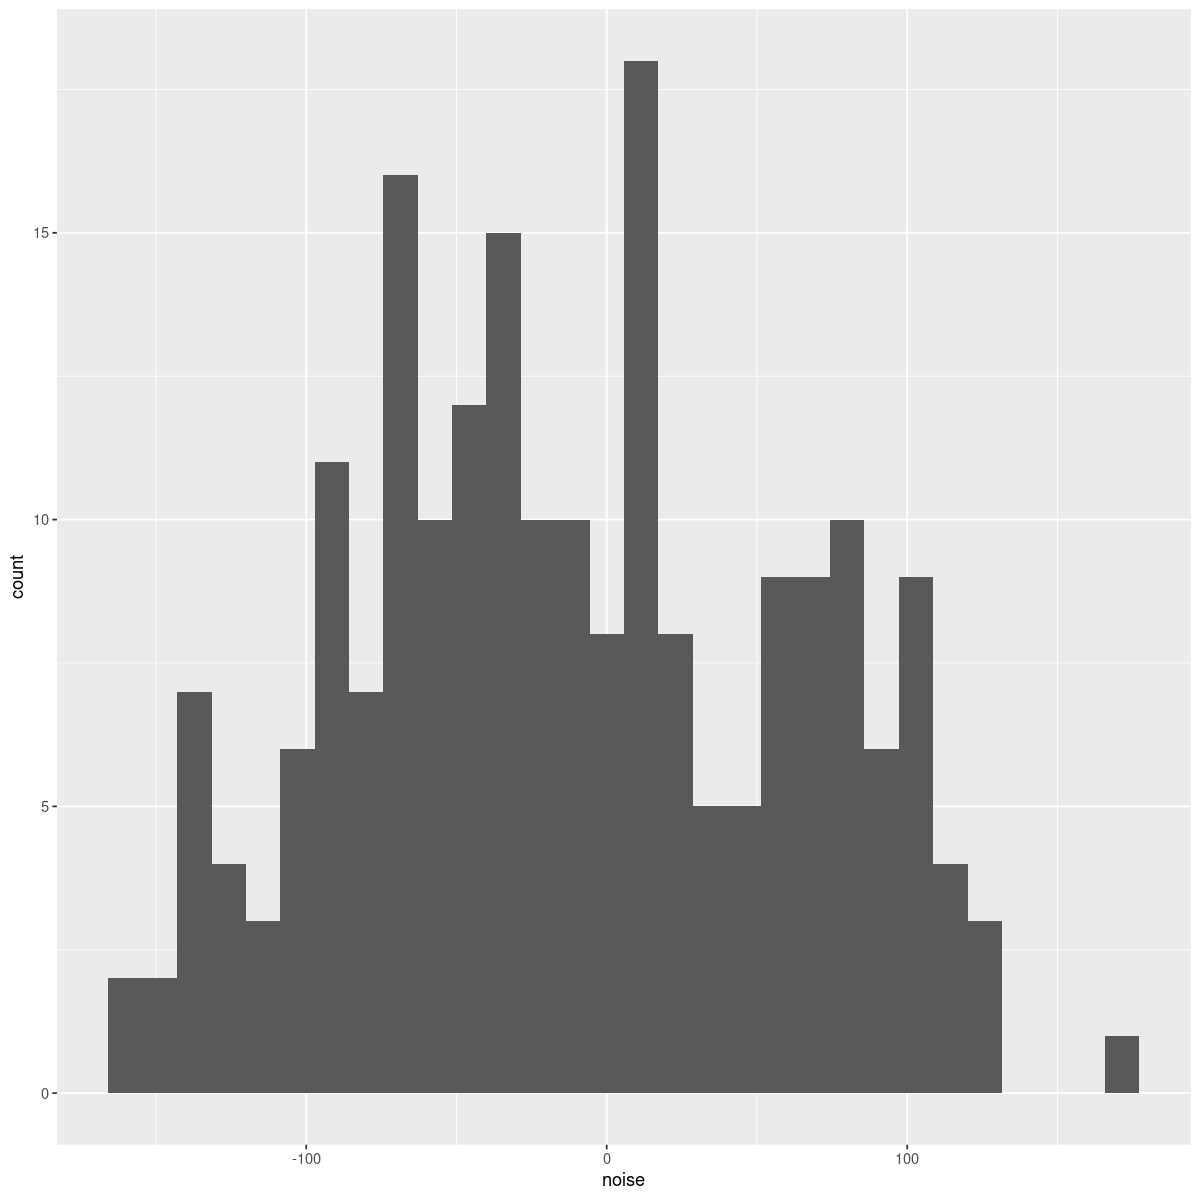

In [12]:
noise <- rnorm(21*21, sd=50) %>% matrix(nrow=21)
noise <- noise + t(noise)


noise %>% 
    as.dist() %>%
    c() %>%
    tibble() %>%
    rename(noise=1) %>%
    ggplot() +
    geom_histogram(aes(x=noise))

In [13]:
observed <- observed + noise
mds_noise <- cmdscale(observed) %>%
    as_tibble() %>%
    rename(x=1, y=2) %>%
    mutate(city=cities)
    
mds_noise


x,y,city
<dbl>,<dbl>,<chr>
-407.695813,1741.46247,Athens
701.302642,213.40179,Barcelona
-148.589345,-370.99930,Brussels
-118.091799,-551.84084,Calais
198.358718,-628.79376,Cherbourg
-320.481018,-132.28538,Cologne
-939.366010,-340.94329,Copenhagen
117.404034,114.70808,Geneva
1575.634794,72.47119,Gibraltar


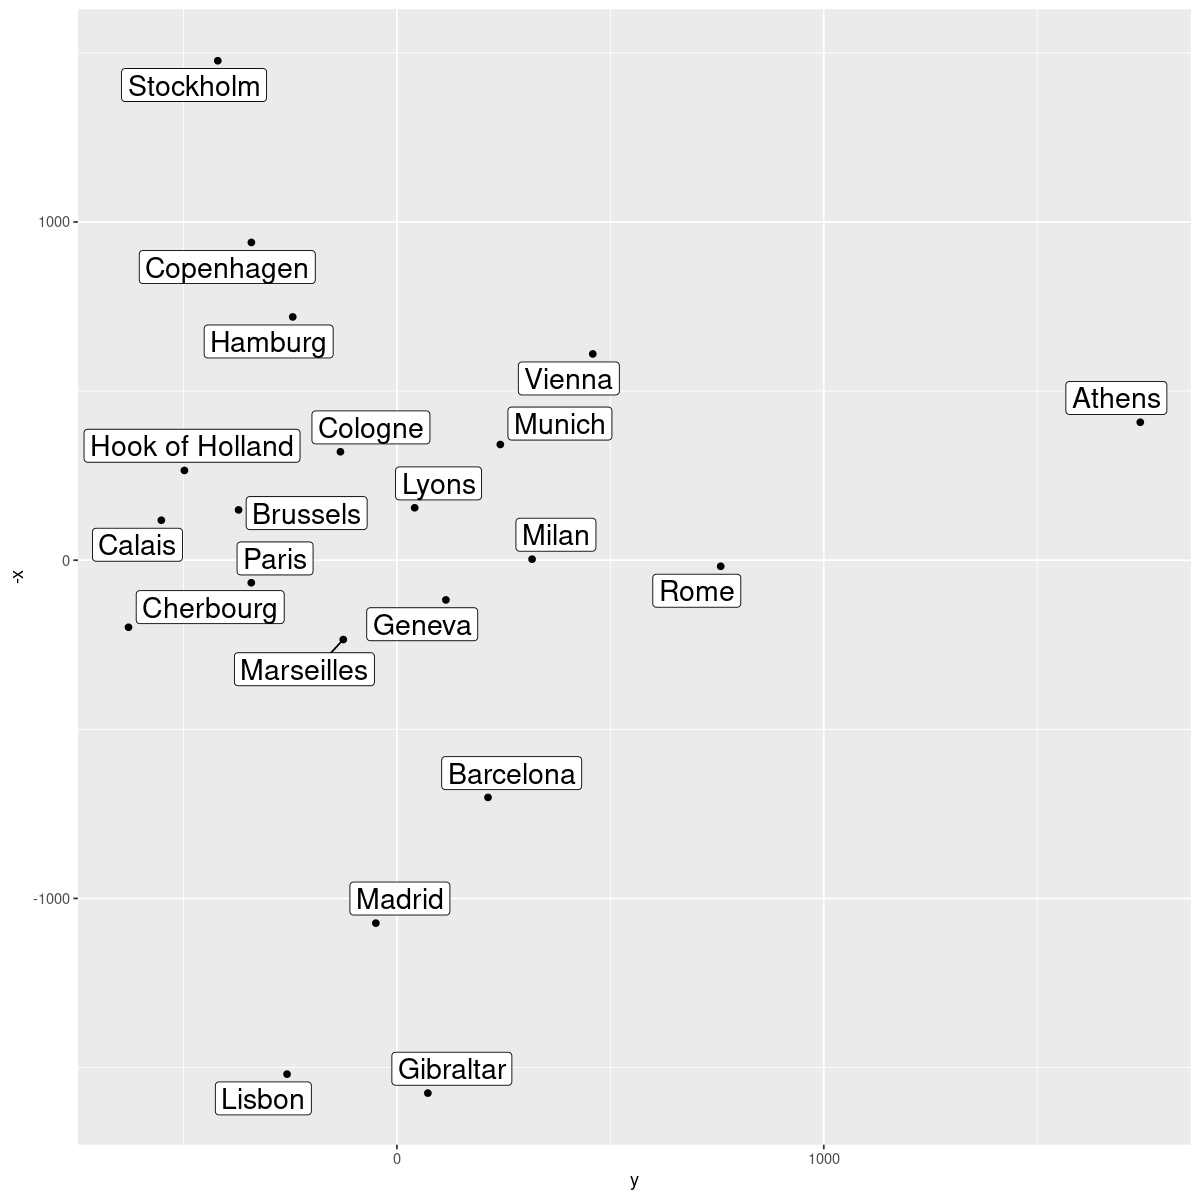

In [14]:
ggplot(mds_noise) +
    geom_point(aes(x=y, y=-x)) +
    geom_label_repel(aes(x=y, y=-x, label=city), size=6)

Warning message in dist(mds_noise):
“NAs introduced by coercion”
`geom_smooth()` using formula 'y ~ x'



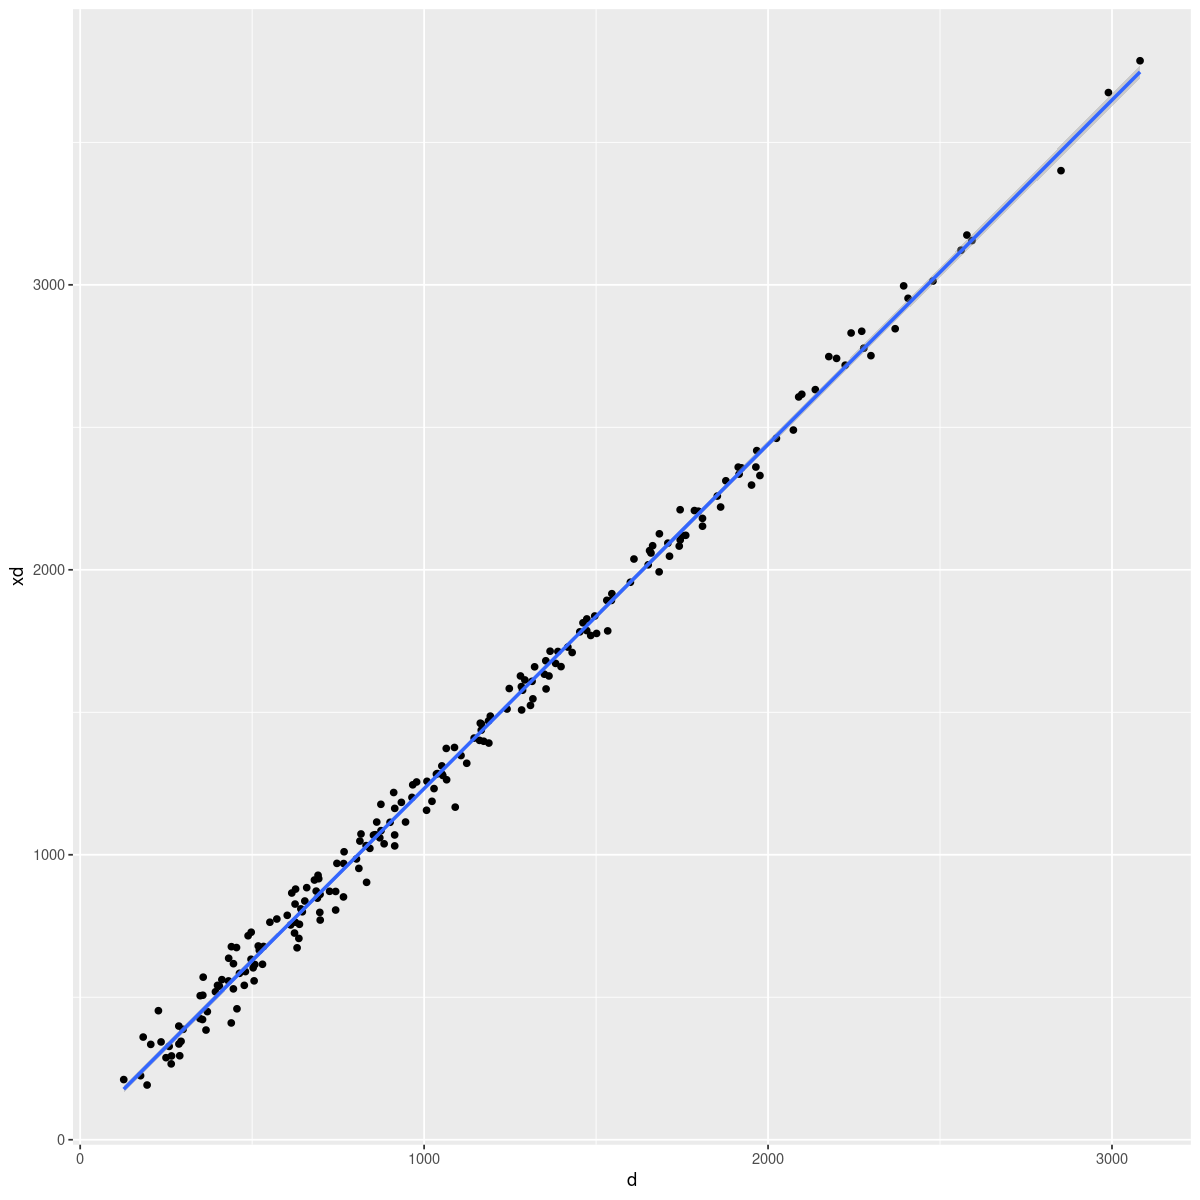

In [15]:
data.frame(d=c(my_eurodist), xd=c(dist(mds_noise))) %>%
    ggplot() + 
    geom_point(aes(x=d, y = xd)) +
    geom_smooth(aes(x=d, y=xd), method=lm)

- MDS projects any dissimilarity matrix into a low-dimensional feature space 
- features are automatically chosen to maximize the preserved variance